## 라이브러리

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import autokeras as ak
from sklearn.model_selection import train_test_split
import jinja2
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
df = pd.read_csv('../dataset/master_3.csv')
df.head()

,index,subject_id,stay_id,intime,outtime,gender,in_year,age,outcome_inhospital_mortality,ed_death,before_ed_mortality,ed_los,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
0,335314,10000032,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,0,2180,52,False,False,False,0 days 04:13:00,False,True,False,0,0,0,False,0,0,0,0,0,0,4.22,36.888889,70.0,16.0,97.0,106.0,63.0,0.0,3.0,False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0
1,335315,10000032,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,0,2180,52,False,False,False,0 days 05:37:00,False,True,False,0,1,1,False,0,1,1,0,0,0,5.62,37.166667,88.0,18.0,97.0,116.0,88.0,10.0,3.0,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36.611111,86.0,17.0,93.0,96.0,57.0,5.0,3.0,12.0
2,335316,10000032,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,0,2180,52,False,False,False,0 days 13:30:00,True,True,True,1,2,2,True,1,2,2,0,0,0,13.50,36.555556,87.0,14.0,97.0,71.0,43.0,7.0,2.0,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,36.777778,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0
3,335317,10000032,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,0,2180,52,False,False,False,0 days 08:06:00,True,True,True,2,3,3,False,1,2,2,0,0,0,8.10,37.055556,77.0,16.0,98.0,96.0,50.0,4.0,2.0,False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,37.222222,96.0,18.0,97.0,86.0,45.0,0.0,8.0,14.0
4,335318,10000032,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,0,2180,52,False,False,False,0 days 04:46:00,False,True,False,2,3,4,False,1,2,3,1,1,1,4.77,37.444444,105.0,18.0,96.0,106.0,57.0,10.0,3.0,False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,36.722222,91.0,18.0,99.0,98.0,60.0,0.0,6.0,7.0


In [ ]:
df.columns

Index(['index', 'subject_id', 'stay_id', 'intime', 'outtime', 'gender',
       'in_year', 'age', 'outcome_inhospital_mortality', 'ed_death',
       ...
       'eci_Depression', 'ed_temperature_last', 'ed_heartrate_last',
       'ed_resprate_last', 'ed_o2sat_last', 'ed_sbp_last', 'ed_dbp_last',
       'ed_pain_last', 'n_med', 'n_medrecon'],
      dtype='object', length=101)

In [8]:
drop_df = df.drop(list(df.filter(regex='cci_').columns), axis=1)

In [9]:
drop_df = drop_df.drop(['outcome_icu_transfer_12h'], axis=1)

In [10]:
drop_df = drop_df.drop(['chiefcom_chest_pain', 'chiefcom_abdominal_pain',
    'chiefcom_headache', 'chiefcom_shortness_of_breath',
    'chiefcom_back_pain', 'chiefcom_cough', 'chiefcom_nausea_vomiting',
    'chiefcom_fever_chills', 'chiefcom_syncope', 'chiefcom_dizziness',
    'eci_CHF', 'eci_Arrhythmia', 'eci_Valvular', 'eci_PHTN', 'eci_PVD',
    'eci_HTN1', 'eci_HTN2', 'eci_Paralysis', 'eci_NeuroOther',
    'eci_Pulmonary', 'eci_DM1', 'eci_DM2', 'eci_Hypothyroid', 'eci_Renal',
    'eci_Liver', 'eci_PUD', 'eci_HIV', 'eci_Lymphoma', 'eci_Tumor2',
    'eci_Tumor1', 'eci_Rheumatic', 'eci_Coagulopathy', 'eci_Obesity',
    'eci_WeightLoss', 'eci_FluidsLytes', 'eci_BloodLoss', 'eci_Anemia',
    'eci_Alcohol', 'eci_Drugs', 'eci_Psychoses', 'eci_Depression'], axis=1)

In [24]:
obj = pd.DataFrame(drop_df.dtypes != 'object')
drop_df = drop_df[obj[obj[0] == True].index]

In [67]:
drop_df['outcome_critical'].value_counts()

0    419387
1     29585
Name: outcome_critical, dtype: int64

In [25]:
y = drop_df['outcome_critical']
x = drop_df.drop(['outcome_critical'], axis=1)

In [26]:
#언더 샘플링
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({False: 29585, True: 29585})


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, shuffle=True, stratify=y_under, test_size=0.2, random_state=10)

In [100]:
# 오버샘플링
sm = SMOTE(random_state=10)

# train데이터를 넣어 복제함
x_smote, y_smote = sm.fit_sample(data, target)

print('After OverSampling, the shape of train_X: {}'.format(x_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(x_smote.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_smote==True)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_smote==False)))

After OverSampling, the shape of train_X: (838774, 38)
After OverSampling, the shape of train_y: (838774, 38) 



In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, shuffle=True, stratify=y_smote, test_size=0.2, random_state=10)

In [39]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.1, stratify=y_train, 
                                                  random_state=10)

In [39]:
scaler = MinMaxScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)
x_val2 = scaler.transform(x_val)

In [ ]:
corr = drop_df.corr(method='pearson')
corr.sort_values(ascending=False)

## tabnet 해보기

In [1]:
!pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from torch import cuda

device = 'cuda' if cuda.is_available() else 'cpu'

In [88]:
df = pd.concat([x_under, y_under], axis=1)

In [89]:
df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)

In [92]:
train = df.copy()

In [94]:
target = 'outcome_critical'    # 41번째 컬럼
if "Set" not in train.columns:
    train["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(train.shape[0],))

train_indices = train[train.Set=="train"].index
valid_indices = train[train.Set=="valid"].index
test_indices = train[train.Set=="test"].index

In [95]:
nunique = train.nunique()
types = train.dtypes

categorical_columns = []
categorical_dims =  {}
for col in train.columns:
    if types[col] == 'object' or nunique[col] < 200:
        print(col, train[col].nunique())
        l_enc = LabelEncoder()
        train[col] = train[col].fillna("VV_likely")
        train[col] = l_enc.fit_transform(train[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
    else:
        train.fillna(train.loc[train_indices, col].mean(), inplace=True)


# Categorical Embedding을 위해 Categorical 변수의 차원과 idxs를 담음.
unused_feat = ['Set']
features = [ col for col in train.columns if col not in unused_feat+[target]] 
cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]



X_train = train[features].values[train_indices]
y_train = train[target].values[train_indices]

X_valid = train[features].values[valid_indices]
y_valid = train[target].values[valid_indices]

X_test = train[features].values[test_indices]
y_test = train[target].values[test_indices]

gender 2
in_year 102
age 90
outcome_inhospital_mortality 2
ed_death 2
before_ed_mortality 2
outcome_hospitalization 2
n_ed_30d 20
n_ed_90d 37
n_ed_365d 77
outcome_ed_revisit_3d 2
n_hosp_30d 12
n_hosp_90d 24
n_hosp_365d 51
n_icu_30d 5
n_icu_90d 8
n_icu_365d 15
triage_heartrate 173
triage_resprate 58
triage_o2sat 57
triage_dbp 168
triage_pain 22
triage_acuity 5
ed_heartrate_last 173
ed_resprate_last 68
ed_o2sat_last 64
ed_sbp_last 197
ed_dbp_last 159
ed_pain_last 21
n_med 33
n_medrecon 52
outcome_critical 2
Set 3


In [109]:
print(Counter(y_train))

Counter({0: 23664, 1: 23662})


In [98]:
clf = TabNetClassifier(cat_idxs=cat_idxs,
                       cat_dims=cat_dims,
                       cat_emb_dim=10,
                       optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=1e-2),
                       scheduler_params={"step_size":50,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax'                       
                      )

In [99]:
max_epochs = 15

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
)

epoch 0  | loss: 0.68536 | train_auc: 0.67602 | valid_auc: 0.67154 |  0:00:06s
epoch 1  | loss: 0.44863 | train_auc: 0.81147 | valid_auc: 0.79603 |  0:00:09s
epoch 2  | loss: 0.39242 | train_auc: 0.88808 | valid_auc: 0.88324 |  0:00:12s
epoch 3  | loss: 0.37425 | train_auc: 0.89689 | valid_auc: 0.89281 |  0:00:16s
epoch 4  | loss: 0.36138 | train_auc: 0.90463 | valid_auc: 0.89994 |  0:00:21s
epoch 5  | loss: 0.35243 | train_auc: 0.9126  | valid_auc: 0.90831 |  0:00:26s
epoch 6  | loss: 0.34224 | train_auc: 0.91992 | valid_auc: 0.917   |  0:00:29s
epoch 7  | loss: 0.33811 | train_auc: 0.92288 | valid_auc: 0.91988 |  0:00:33s
epoch 8  | loss: 0.33025 | train_auc: 0.92876 | valid_auc: 0.9268  |  0:00:36s
epoch 9  | loss: 0.32002 | train_auc: 0.93272 | valid_auc: 0.93145 |  0:00:40s
epoch 10 | loss: 0.31294 | train_auc: 0.93615 | valid_auc: 0.9342  |  0:00:43s
epoch 11 | loss: 0.30341 | train_auc: 0.93738 | valid_auc: 0.93587 |  0:00:46s
epoch 12 | loss: 0.30553 | train_auc: 0.94064 | vali

In [102]:
preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)

In [108]:
test_auc

0.938108525487649

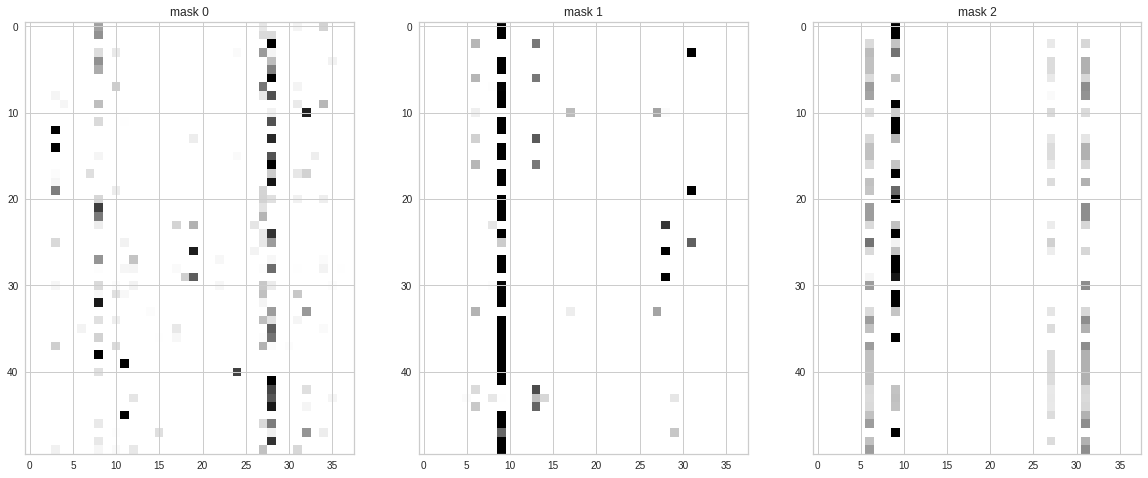

In [105]:
explain_matrix, masks = clf.explain(X_test)

fig, axs = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")